In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
from pyclustertend import hopkins 
import random
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Variables:
- Id: Id de la película
- popularity: Índice de popularidad de la película calculado semanalmente
- budget: El presupuesto para la película.
- revenue: El ingreso de la película.
- original_title: El título original de la película, en su idioma original.
- originalLanguage: Idioma original en que se encuentra la película
- title: El título de la película traducido al inglés
- homePage: La página de inicio de la película
- video: Si tiene videos promocionales o no
- director: Director de la película
- runtime: La duración de la película.
- genres: El género de la película.
- genresAmount: Cantidad de géneros que representan la película
- productionCompany: Las compañías productoras de la película.
- productionCoAmount: Cantidad de compañías productoras que participaron en la película
- productionCompanyCountry: Países de las compañías productoras de la película
- productionCountry: Países en los que se llevó a cabo la producción de la película
- productionCountriesAmount: Cantidad de países en los que se rodó la película
- releaseDate: Fecha de lanzamiento de la película
- voteCount: El número de votos en la plataforma para la película.
- voteAvg: El promedio de los votos en la plataforma para la película
- actors: Actores que participan en la película (Elenco)
- actorsPopularity: Índice de popularidad del elenco de la película.
- actorsCharacter: Personaje que interpreta cada actor en la película
- actorsAmount: Cantidad de personas que actúan en la película
- castWomenAmount: Cantidad de actrices en el elenco de la película
- castMenAmount: Cantidad de actores en el elenco de la película.

In [2]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)
archivo_csv = "movies.csv"
datos = pd.read_csv(archivo_csv, encoding='ISO-8859-1')

In [3]:
print(datos.isnull().sum())  # Cantidad de valores nulos por columna
print(datos.duplicated().sum())  # Cantidad de filas duplicadas


id                              0
budget                          0
genres                         53
homePage                     5807
productionCompany             457
productionCompanyCountry     1280
productionCountry             233
revenue                         0
runtime                         0
video                         486
director                       74
actors                         80
actorsPopularity               87
actorsCharacter                47
originalTitle                   0
title                           0
originalLanguage                0
popularity                      0
releaseDate                     0
voteAvg                         0
voteCount                       0
genresAmount                    0
productionCoAmount              0
productionCountriesAmount       0
actorsAmount                    0
castWomenAmount                 0
castMenAmount                   0
dtype: int64
0


In [8]:
datos.fillna(datos.mean(), inplace=True)
print(datos.isnull().sum())

id                           0
budget                       0
genres                       0
homePage                     0
productionCompany            0
productionCompanyCountry     0
productionCountry            0
revenue                      0
runtime                      0
video                        0
director                     0
actors                       0
actorsPopularity             0
actorsCharacter              0
originalTitle                0
title                        0
originalLanguage             0
popularity                   0
releaseDate                  0
voteAvg                      0
voteCount                    0
genresAmount                 0
productionCoAmount           0
productionCountriesAmount    0
actorsAmount                 0
castWomenAmount              0
castMenAmount                0
dtype: int64


C:\Users\sebas\AppData\Local\Temp\ipykernel_7348\3244333919.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.fillna(datos.mean(), inplace=True)


Columnas a utilizar:
popularity (Índice de popularidad de la película)
budget (Presupuesto de la película)
revenue (Ingresos de la película)
runtime (Duración de la película)
genresAmount (Cantidad de géneros de la película)
productionCoAmount (Cantidad de compañías productoras)
productionCountriesAmount (Cantidad de países de producción)
voteCount (Número de votos en la plataforma)
voteAvg (Promedio de los votos)
actorsPopularity (Índice de popularidad del elenco)
actorsAmount (Cantidad de actores en la película)
castWomenAmount (Cantidad de actrices en el elenco)
castMenAmount (Cantidad de actores en el elenco)

In [24]:
columnas_numericas = datos.select_dtypes(include=['number']).columns.tolist()

# Obtener los nombres de las columnas no numéricas
columnas_no_numericas = datos.select_dtypes(exclude=['number']).columns.tolist()
print("Columnas numéricas:")
print(columnas_numericas)

print("\nColumnas no numéricas:")
print(columnas_no_numericas)

Columnas numéricas:
['id', 'budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'actorsAmount']

Columnas no numéricas:
['genres', 'homePage', 'productionCompany', 'productionCompanyCountry', 'productionCountry', 'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter', 'originalTitle', 'title', 'originalLanguage', 'releaseDate', 'castWomenAmount', 'castMenAmount']


In [43]:
# Lista de columnas numéricas que usaremos
columnas_numericas = [
    "popularity", "budget", "revenue", "runtime", "genresAmount", 
    "productionCoAmount", "productionCountriesAmount", "voteCount", 
    "voteAvg","actorsAmount"
]

# Crear un nuevo DataFrame con solo estas columnas
datos_numericos = datos[columnas_numericas].copy()

In [42]:
print(datos['actorsAmount'].head(5))

0     25
10    71
11    36
14    37
16    19
Name: actorsAmount, dtype: int64


1.1 Preprocesamiento del dataset

Varianza de las columnas:
popularity                   1.151708e+05
budget                       2.018101e+15
revenue                      3.717795e+16
runtime                      5.051393e+02
genresAmount                 1.220544e+00
productionCoAmount           5.537581e+00
productionCountriesAmount    7.435858e-01
voteCount                    1.070363e+07
voteAvg                      7.639494e-01
actorsAmount                 6.206335e+02
dtype: float64


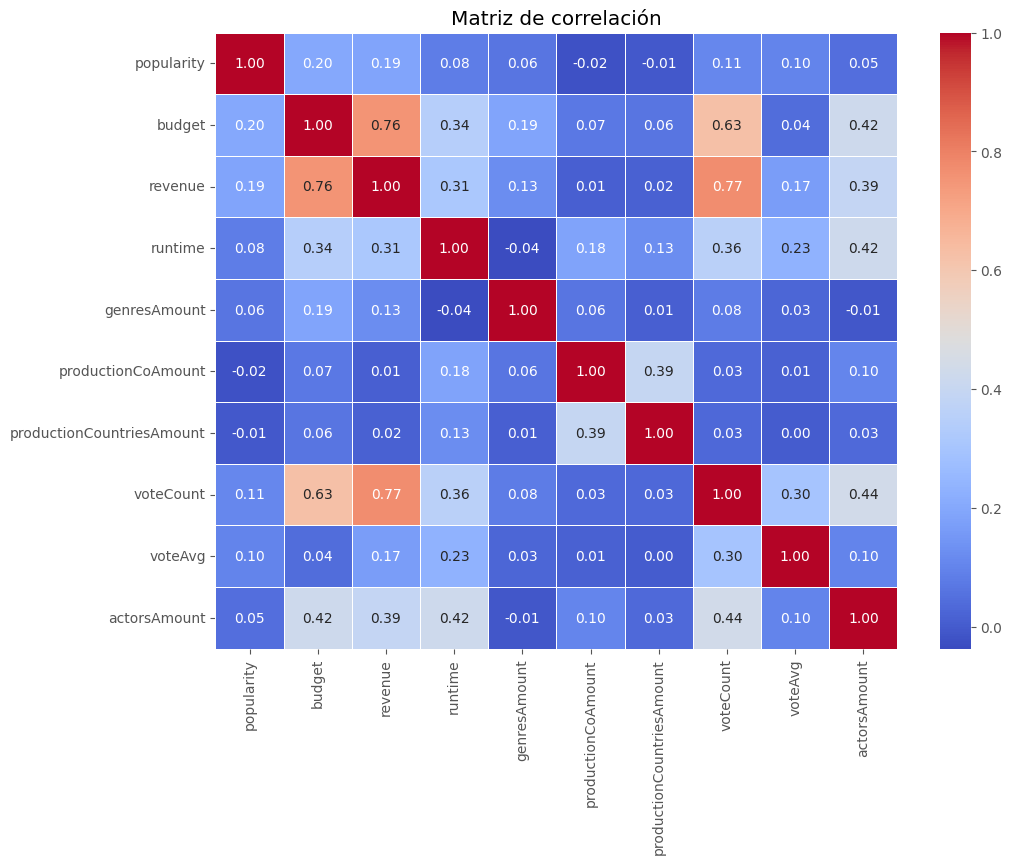

In [44]:
# Verificar varianza de las columnas
varianzas = datos_numericos.var()
print("Varianza de las columnas:")
print(varianzas)

# Visualizar matriz de correlación
plt.figure(figsize=(11, 8))
sb.heatmap(datos_numericos.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()


1.2 Análisis de la tendencia al agrupamiento

In [45]:
# Convertir a numpy array
X = datos_numericos.to_numpy()

# Calcular Hopkins
hopkins_stat = hopkins(X, len(X))
print(f"Estadístico de Hopkins: {hopkins_stat}")


Estadístico de Hopkins: 0.019697399727146146


1.3 Determinar el número óptimo de clusters

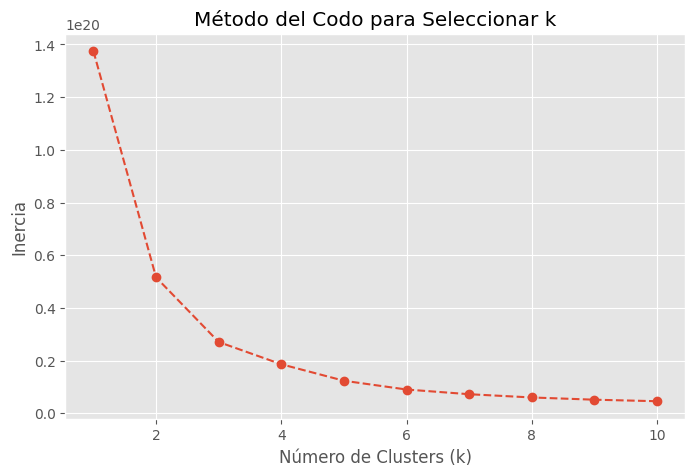

In [46]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Evaluar inercia para distintos valores de k
inercia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inercia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo para Seleccionar k")
plt.show()


1.4 Aplicar K-Means y Clustering Jerárquico

In [ ]:


# Número óptimo de clusters (suponiendo que elegimos k=4)
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
datos_numericos["Cluster_KMeans"] = kmeans.fit_predict(X)


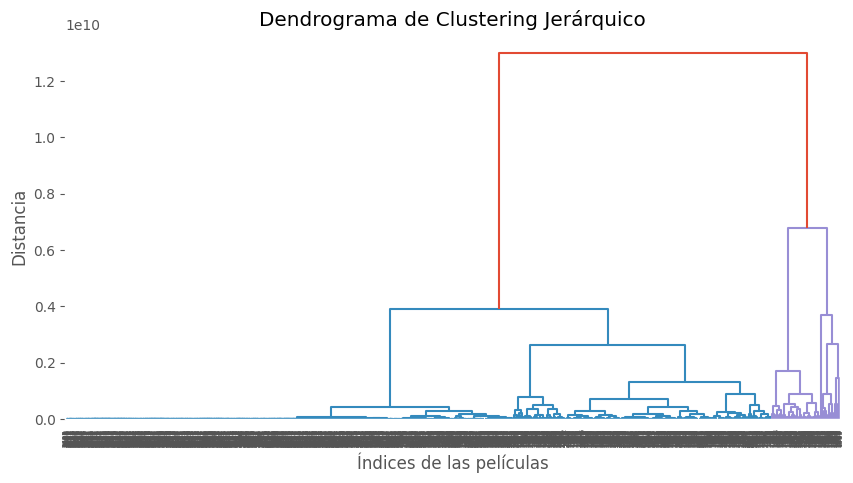

In [ ]:


# Generar el dendrograma
plt.figure(figsize=(10, 5))
Z = linkage(X, method="ward")  # Método Ward minimiza la varianza dentro de cada cluster
dendrogram(Z)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índices de las películas")
plt.ylabel("Distancia")
plt.show()

# Asignar clusters según un corte óptimo
datos_numericos["Cluster_Hierarchical"] = fcluster(Z, k_optimo, criterion="maxclust")


1.5 Evaluar la calidad del clustering

In [51]:


# Calcular Silhouette Score para K-Means
silhouette_kmeans = silhouette_score(X, datos_numericos["Cluster_KMeans"])
print(f"Índice de Silueta para K-Means: {silhouette_kmeans}")

# Calcular Silhouette Score para Clustering Jerárquico
silhouette_hierarchical = silhouette_score(X, datos_numericos["Cluster_Hierarchical"])
print(f"Índice de Silueta para Clustering Jerárquico: {silhouette_hierarchical}")


Índice de Silueta para K-Means: 0.7517062617003474
Índice de Silueta para Clustering Jerárquico: 0.5832859345144917


1.6 Interpretación de los grupos

In [52]:
# Ver media y mediana de cada variable por cluster
print(datos_numericos.groupby("Cluster_KMeans").agg(["mean", "median"]))


                popularity                  budget                    revenue  \
                      mean    median          mean       median          mean   
Cluster_KMeans                                                                  
0                47.287407   22.3865  1.231524e+07     115089.0  2.179584e+07   
1               205.500379  154.5430  1.486180e+08  150000000.0  7.966553e+08   
2               160.299122   48.4910  7.772955e+07   70000000.0  2.661030e+08   
3               879.104000  257.5530  2.266429e+08  210000000.0  1.670340e+09   

                                 runtime        genresAmount         \
                      median        mean median         mean median   
Cluster_KMeans                                                        
0               6.744165e+05  101.695114  101.0     2.635582    3.0   
1               7.863656e+08  130.038835  130.0     3.145631    3.0   
2               2.374758e+08  115.051653  114.0     2.981405    3.0   
3     